# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muh. Zulkipli Noor Hermawan]
- **Email:** [muhzulkiplinoorhermawan@gmail.com & mc013d5y0422@student.devacademy.id]
- **ID Dicoding:** [muhzulkiplinoor20]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
2. Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/MC03 Proyek Analisis Data/"

day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/day.csv")
hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/hour.csv")

day_df.head()
hour_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 dashboard.py   day.csv   hour.csv  ' MC03 Proyek Analisis Data.ipynb'	 README.md   Readme.txt


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset memiliki informasi terkait penyewaan sepeda, cuaca, musim, suhu, kelembaban, dan kecepatan angin.
- Data tersedia dalam dua bentuk: agregasi harian (day.csv) dan agregasi per jam (hour.csv).

### Assessing Data

In [8]:
day_df.info()
hour_df.info()

day_df.isnull().sum()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada nilai yang hilang dalam dataset.
- Beberapa kolom perlu diperjelas interpretasinya, misalnya kode numerik untuk musim dan cuaca.

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

**Insight:**
- Format tanggal dikonversi ke datetime untuk analisis lebih lanjut.
- Kolom "instant" dihapus karena tidak memberikan informasi analitis yang berarti.

## Exploratory Data Analysis (EDA)

### Explore ...

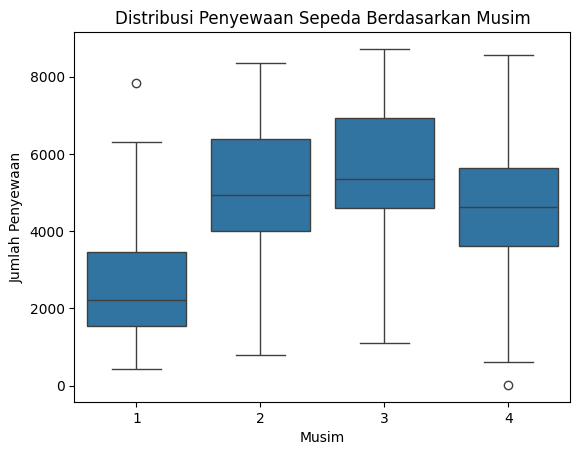

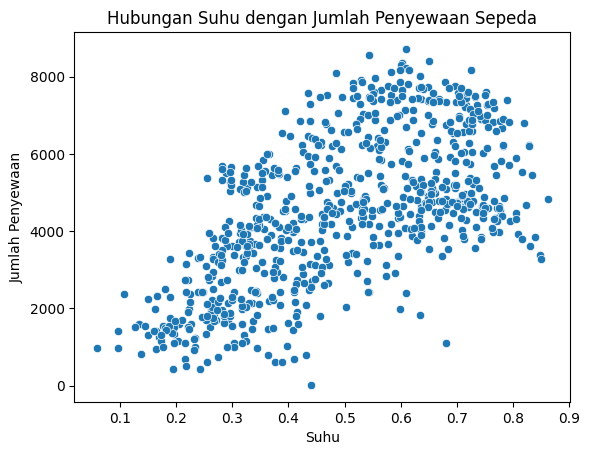

In [10]:
### Explore Pengaruh Musim terhadap Penyewaan Sepeda
sns.boxplot(x='season', y='cnt', data=day_df)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Explore Hubungan Suhu dengan Penyewaan
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada musim panas dan gugur, sementara musim semi memiliki jumlah penyewaan lebih rendah.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, di mana suhu yang lebih tinggi cenderung meningkatkan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

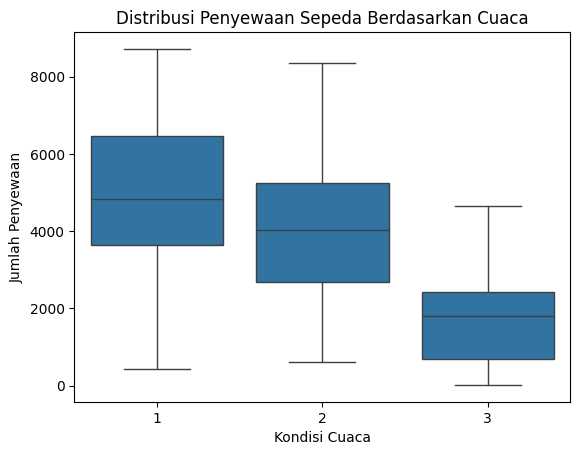

In [11]:
### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

### Pertanyaan 2:

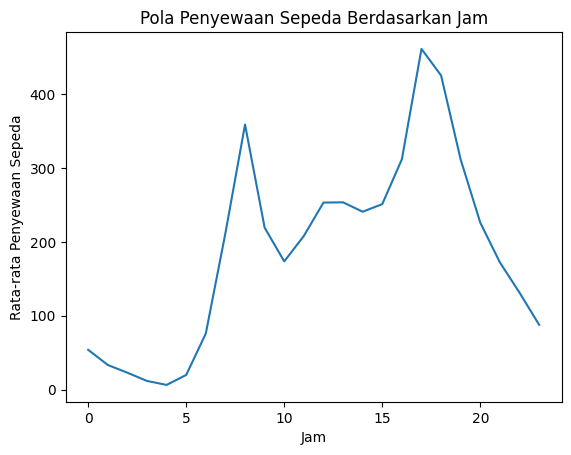

In [12]:
### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

sns.lineplot(x='hr', y='cnt', data=hour_df.groupby('hr').mean().reset_index())
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.show()

**Insight:**
- Cuaca yang lebih buruk (kategori 3 dan 4) cenderung memiliki jumlah penyewaan lebih rendah.
- Pola menunjukkan adanya lonjakan penyewaan pada jam sibuk (pagi dan sore), kemungkinan terkait perjalanan kerja.

## Analisis Lanjutan (Opsional)

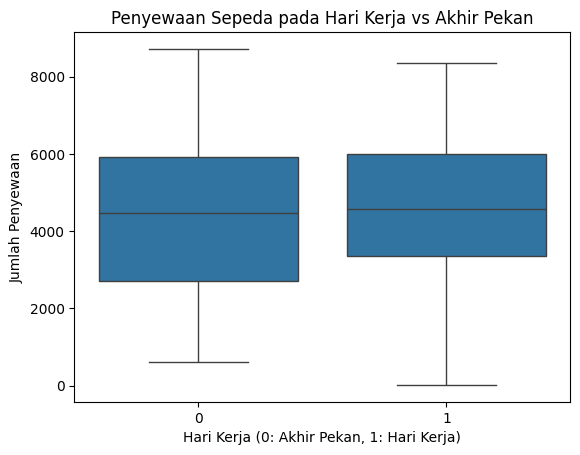

In [13]:
### Pengaruh Hari Kerja vs Akhir Pekan terhadap Penyewaan
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.xlabel("Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.title("Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Jumlah penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Kemungkinan besar karena banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja.

## Conclusion

- Cuaca yang lebih baik cenderung meningkatkan jumlah penyewaan sepeda.
- Pola penyewaan sepeda menunjukkan puncak pada jam kerja pagi dan sore hari.
- Penyewaan lebih tinggi saat musim panas dan gugur dibandingkan musim semi.
- Hari kerja memiliki lebih banyak penyewaan dibandingkan akhir pekan.

In [14]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


2025-03-14 15:26:43.595 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.704 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-14 15:26:43.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 15:26:43.712 Session state does not 

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

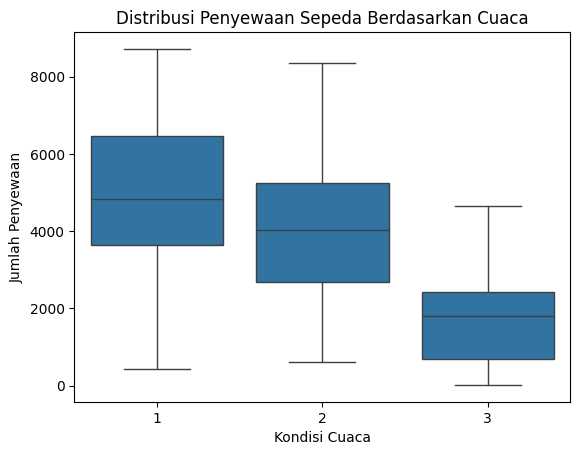

In [16]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memuat data
def load_data():
    day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/day.csv")
    hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/hour.csv")
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
    return day_df, hour_df

# Load Data
day_df, hour_df = load_data()

# Sidebar
st.sidebar.title("Bike Sharing Dashboard")
page = st.sidebar.radio("Pilih Analisis:", ["Pengaruh Cuaca", "Pola Penyewaan Sepeda"])

# Judul Utama
st.title("Dashboard Analisis Bike Sharing")

if page == "Pengaruh Cuaca":
    st.header("Pengaruh Cuaca terhadap Penyewaan Sepeda")
    fig, ax = plt.subplots()
    sns.boxplot(x='weathersit', y='cnt', data=day_df, ax=ax)
    ax.set_xlabel("Kondisi Cuaca")
    ax.set_ylabel("Jumlah Penyewaan")
    ax.set_title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca")
    st.pyplot(fig)

    st.write("**Insight:** Cuaca yang lebih buruk cenderung menurunkan jumlah penyewaan sepeda.")

elif page == "Pola Penyewaan Sepeda":
    st.header("Pola Penyewaan Sepeda Berdasarkan Jam")
    avg_hourly = hour_df.groupby('hr').mean().reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x='hr', y='cnt', data=avg_hourly, ax=ax)
    ax.set_xlabel("Jam")
    ax.set_ylabel("Rata-rata Penyewaan Sepeda")
    ax.set_title("Pola Penyewaan Sepeda Berdasarkan Jam")
    st.pyplot(fig)

    st.write("**Insight:** Ada lonjakan penyewaan pada jam sibuk pagi dan sore hari.")

# Tambahkan footer
st.sidebar.markdown("---")
st.sidebar.text("Dibuat oleh: Muh. Zulkipli Noor Hermawan")

In [4]:
code = """import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memuat data
def load_data():
    day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/day.csv")
    hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/hour.csv")
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
    return day_df, hour_df

# Load Data
day_df, hour_df = load_data()

# Sidebar
st.sidebar.title("Bike Sharing Dashboard")
page = st.sidebar.radio("Pilih Analisis:", ["Pengaruh Cuaca", "Pola Penyewaan Sepeda"])

# Judul Utama
st.title("Dashboard Analisis Bike Sharing")

if page == "Pengaruh Cuaca":
    st.header("Pengaruh Cuaca terhadap Penyewaan Sepeda")
    fig, ax = plt.subplots()
    sns.boxplot(x='weathersit', y='cnt', data=day_df, ax=ax)
    ax.set_xlabel("Kondisi Cuaca")
    ax.set_ylabel("Jumlah Penyewaan")
    ax.set_title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca")
    st.pyplot(fig)

    st.write("**Insight:** Cuaca yang lebih buruk cenderung menurunkan jumlah penyewaan sepeda.")

elif page == "Pola Penyewaan Sepeda":
    st.header("Pola Penyewaan Sepeda Berdasarkan Jam")
    avg_hourly = hour_df.groupby('hr').mean().reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x='hr', y='cnt', data=avg_hourly, ax=ax)
    ax.set_xlabel("Jam")
    ax.set_ylabel("Rata-rata Penyewaan Sepeda")
    ax.set_title("Pola Penyewaan Sepeda Berdasarkan Jam")
    st.pyplot(fig)

    st.write("**Insight:** Ada lonjakan penyewaan pada jam sibuk pagi dan sore hari.")

# Tambahkan footer
st.sidebar.markdown("---")
st.sidebar.text("Dibuat oleh: Muh. Zulkipli Noor Hermawan")
"""

with open("/content/dashboard.py", "w") as file:
    file.write(code)

print("✅ File dashboard.py berhasil disimpan di /content/")

✅ File dashboard.py berhasil disimpan di /content/


In [9]:
!ls /content/

dashboard.py  drive  sample_data


In [10]:
from google.colab import files
files.download("/content/dashboard.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
from google.colab import files

# Load dataset
path_day = "/content/day.csv"  # Sesuaikan dengan path file di Google Drive jika perlu
path_hour = "/content/hour.csv"

day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/day.csv")
hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data/hour.csv")

# Convert 'dteday' to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Drop unnecessary columns
day_df.drop(columns=['instant'], inplace=True, errors='ignore')
hour_df.drop(columns=['instant'], inplace=True, errors='ignore')

# Merge data on 'dteday'
merged_df = pd.concat([day_df, hour_df], ignore_index=True)

# Save cleaned and merged data
merged_csv_path = "/content/main_data.csv"
merged_df.to_csv(merged_csv_path, index=False)

# Download file in Google Colab
files.download(merged_csv_path)

print("✅ File main_data.csv berhasil dibuat dan siap diunduh!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ File main_data.csv berhasil dibuat dan siap diunduh!
